<a href="https://colab.research.google.com/github/martinfinis/HelloCodeSchoolProject/blob/master/Quest_NN_1_Martin_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparation
Import TensorFlow library and the [Boston housing dataset](https://keras.io/api/datasets/boston_housing/) by running the cells below. In this quest, we will be predicting house prices based on various features. For this purose, we will build a very basic neural network. In the later quests, you will build upon this framework and extend it with new methods, better suited for achieving better results with the current task as well as running more complex ones.

In [ ]:
import tensorflow as tf
boston_housing = tf.keras.datasets.boston_housing

In [ ]:
#keep the results
import pandas as pd
df = pd.DataFrame(columns=['description','epoch','eval_loss','eval_loss','train_loss_min','val_loss_min','train_mse_min','val_mse_min','model','history'])

In [ ]:
df

,description,epoch,eval_loss,eval_loss,train_loss_min,val_loss_min,train_mse_min,val_mse_min,model,history


# Tasks

From the dataset, extract training and testing features and labels.

In [ ]:
data = boston_housing.load_data(test_split=0.2)

57344/57026 [==============================] - 0s 0us/step


In [ ]:
type(data)

tuple

In [ ]:
data[0][0].shape

(404, 13)

In [ ]:
import numpy as np

X_train = data[0][0]
y_train = data[0][1]
X_test = data[1][0]
y_test = data[1][1]

y_train = np.reshape(y_train, (y_train.shape[0],1))
y_test = np.reshape(y_test, (y_test.shape[0],1))

print('Shape of training data:    ', X_train.shape)
print('Shape of training labels:  ', y_train.shape)
print('Shape of test data:        ', X_test.shape)
print('Shape of test labels:      ', y_test.shape)

Shape of training data:     (404, 13)
Shape of training labels:   (404, 1)
Shape of test data:         (102, 13)
Shape of test labels:       (102, 1)


In [ ]:
X_train.shape

(404, 13)

Build a very simple sequential model with three [dense](https://medium.com/datathings/dense-layers-explained-in-a-simple-way-62fe1db0ed75) layers - one input layer for the features, one hidden layer and one output layer for the price prediction. Equip the hidden layers with 64 neurons. How many nodes does the output layer need? An what activation function? Make the input and the hidden layer use [ReLu](https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/) as your activation function.

In [ ]:
X_train.shape[1]

13

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model_1 = Sequential()
model_1.add(Dense(64, activation = 'relu', input_shape = (X_train.shape[1],)))
model_1.add(Dense(64, activation = 'relu'))
model_1.add(Dense(1))

Print the model summary to get an overview of it in the cell below.

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


Now, compile your model. For the sake of simplicity, use Mean Squared Error both as loss function and as metrics. For optimization, use [Adam](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/#:~:text=Adam%20is%20an%20optimization%20algorithm,iterative%20based%20in%20training%20data.&text=The%20algorithm%20is%20called%20Adam.).

In [ ]:
model_1.compile(optimizer='adam', loss = 'mse', metrics='mse')

Fit the model on the train data. 1000 epochs should be more than enough. 

In [ ]:
history_1 = model_1.fit(X_train, y_train, epochs=1000, verbose = 1, validation_split=0.2)

Epoch 1/1000
11/11 [==============================] - 4s 42ms/step - loss: 2000.2448 - mse: 2000.2448 - val_loss: 589.5509 - val_mse: 589.5509
Epoch 2/1000
11/11 [==============================] - 0s 5ms/step - loss: 263.3852 - mse: 263.3852 - val_loss: 230.1303 - val_mse: 230.1303
Epoch 3/1000
11/11 [==============================] - 0s 5ms/step - loss: 151.6762 - mse: 151.6762 - val_loss: 158.8964 - val_mse: 158.8964
Epoch 4/1000
11/11 [==============================] - 0s 5ms/step - loss: 98.3661 - mse: 98.3661 - val_loss: 92.0209 - val_mse: 92.0209
Epoch 5/1000
11/11 [==============================] - 0s 5ms/step - loss: 73.4588 - mse: 73.4588 - val_loss: 96.0440 - val_mse: 96.0440
Epoch 6/1000
11/11 [==============================] - 0s 5ms/step - loss: 75.7952 - mse: 75.7952 - val_loss: 77.6037 - val_mse: 77.6037
Epoch 7/1000
11/11 [==============================] - 0s 5ms/step - loss: 53.7220 - mse: 53.7220 - val_loss: 76.8387 - val_mse: 76.8387
Epoch 8/1000
11/11 [=============

Finally, evaluate your model on the test data and get the score.

In [ ]:
loss_1, acc_1 = model_1.evaluate(X_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 24.3763 - mse: 24.3763


#Further suggestions: 

Plot the loss on the training AND validation set for each epoch

What does this tell you about your model? 

Try out different hyperparameters, i.e. reduce the number of neurons in your hidden layers - or increase them, add more hidden layers, add some regularization, i.e. L2-regularization or dropout

## Plot the loss on the training AND validation set for each epoch

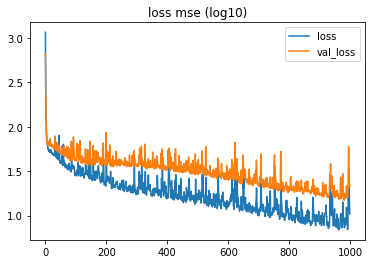

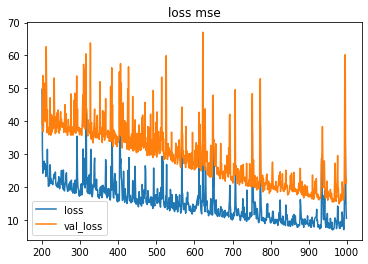

In [ ]:
import matplotlib.pyplot as plt

train_loss_list = history.history['loss']
val_loss_list = history.history['val_loss']

x = np.arange(len(train_loss_list))

plt.plot(x, np.log10(train_loss_list))
plt.plot(x, np.log10(val_loss_list))
plt.legend(['loss', 'val_loss'])
plt.title("loss mse (log10)")
plt.show()

x_from = 200
plt.plot(x[x_from:], train_loss_list[x_from:])
plt.plot(x[x_from:], val_loss_list[x_from:])
plt.legend(['loss', 'val_loss'])
plt.title("loss mse")
plt.show()

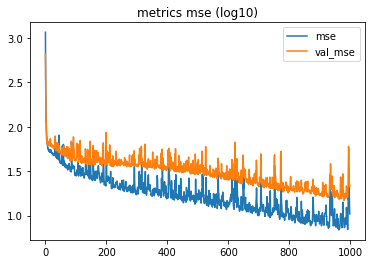

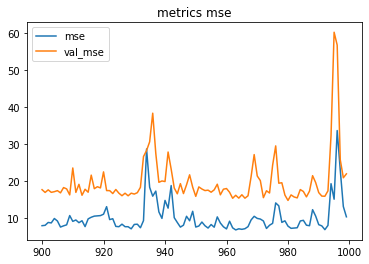

In [ ]:
train_loss_list = history.history['mse']
val_loss_list = history.history['val_mse']

x = np.arange(len(train_loss_list))

plt.plot(x, np.log10(train_loss_list))
plt.plot(x, np.log10(val_loss_list))
plt.legend(['mse', 'val_mse'])
plt.title("metrics mse (log10)")
plt.show()

x_from = 900
plt.plot(x[x_from:], train_loss_list[x_from:])
plt.plot(x[x_from:], val_loss_list[x_from:])
plt.legend(['mse', 'val_mse'])
plt.title("metrics mse")
plt.show()

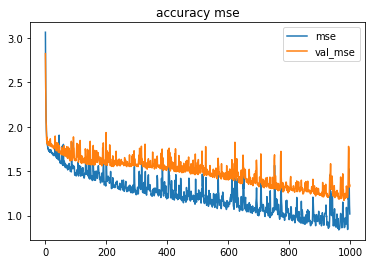

In [ ]:
train_loss_list = history.history['mse']
val_loss_list = history.history['val_mse']

x = np.arange(len(train_loss_list))

plt.plot(x, np.log10(train_loss_list))
plt.plot(x, np.log10(val_loss_list))
plt.legend(['mse', 'val_mse'])
plt.title("accuracy mse")
plt.show()

### loss min (5.671, 14.267)

In [ ]:
min(train_loss_list_1),min(val_loss_list_1)

(6.889901638031006, 14.838817596435547)

In [ ]:
df.loc[len(df)] = ['2 layer','1000',loss_1,acc_1,min(train_loss_list),min(val_loss_list),model_1,history_1]
df

,description,epoch,loss_eval,acc_eval,model,history
0,2 layer,1000,24.376295,24.376295,<tensorflow.python.keras.engine.sequential.Seq...,<tensorflow.python.keras.callbacks.History obj...


## reduce the number of neurons in your hidden layers to 32

In [ ]:
model_2 = Sequential()
model_2.add(Dense(32, activation = 'relu', input_shape = (X_train.shape[1],)))
model_2.add(Dense(32, activation = 'relu'))
model_2.add(Dense(1))
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                448       
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 1,537
Trainable params: 1,537
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2.compile(optimizer='adam', loss = 'mse', metrics='mse')
history_2 = model_2.fit(X_train, y_train, epochs=1000, verbose = 1, validation_split=0.2)

Epoch 1/1000
11/11 [==============================] - 1s 17ms/step - loss: 1242.2932 - mse: 1242.2932 - val_loss: 413.3602 - val_mse: 413.3602
Epoch 2/1000
11/11 [==============================] - 0s 6ms/step - loss: 234.8521 - mse: 234.8521 - val_loss: 192.3502 - val_mse: 192.3502
Epoch 3/1000
11/11 [==============================] - 0s 6ms/step - loss: 130.6342 - mse: 130.6342 - val_loss: 134.0783 - val_mse: 134.0783
Epoch 4/1000
11/11 [==============================] - 0s 5ms/step - loss: 94.3412 - mse: 94.3412 - val_loss: 93.6332 - val_mse: 93.6332
Epoch 5/1000
11/11 [==============================] - 0s 5ms/step - loss: 73.3282 - mse: 73.3282 - val_loss: 82.3251 - val_mse: 82.3251
Epoch 6/1000
11/11 [==============================] - 0s 6ms/step - loss: 64.5896 - mse: 64.5896 - val_loss: 79.0716 - val_mse: 79.0716
Epoch 7/1000
11/11 [==============================] - 0s 6ms/step - loss: 66.7185 - mse: 66.7185 - val_loss: 95.9806 - val_mse: 95.9806
Epoch 8/1000
11/11 [=============

In [ ]:
loss, acc = model_2.evaluate(X_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 34.5909 - mse: 34.5909


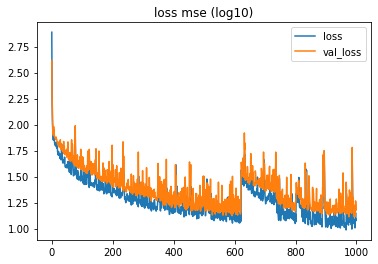

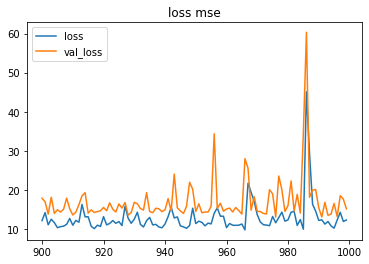

In [ ]:
train_loss_list = history_2.history['loss']
val_loss_list = history_2.history['val_loss']

x = np.arange(len(train_loss_list))

plt.plot(x, np.log10(train_loss_list))
plt.plot(x, np.log10(val_loss_list))
plt.legend(['loss', 'val_loss'])
plt.title("loss mse (log10)")
plt.show()

x_from = 900
plt.plot(x[x_from:], train_loss_list[x_from:])
plt.plot(x[x_from:], val_loss_list[x_from:])
plt.legend(['loss', 'val_loss'])
plt.title("loss mse")
plt.show()

### loss min (7.512, 15.619)

In [ ]:
min(train_loss_list),min(val_loss_list)

(9.708675384521484, 12.98890495300293)

## increase the number of neurons in your hidden layers to 128

In [ ]:
model_3 = Sequential()
model_3.add(Dense(128, activation = 'relu', input_shape = (X_train.shape[1],)))
model_3.add(Dense(128, activation = 'relu'))
model_3.add(Dense(1))
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               1792      
_________________________________________________________________
dense_7 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 129       
Total params: 18,433
Trainable params: 18,433
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_3.compile(optimizer='adam', loss = 'mse', metrics='mse')
history_3 = model_3.fit(X_train, y_train, epochs=1000, verbose = 1, validation_split=0.2)

Epoch 1/1000
11/11 [==============================] - 0s 14ms/step - loss: 766.2047 - mse: 766.2047 - val_loss: 327.7921 - val_mse: 327.7921
Epoch 2/1000
11/11 [==============================] - 0s 5ms/step - loss: 187.0134 - mse: 187.0134 - val_loss: 66.7291 - val_mse: 66.7291
Epoch 3/1000
11/11 [==============================] - 0s 5ms/step - loss: 91.3556 - mse: 91.3556 - val_loss: 74.4175 - val_mse: 74.4175
Epoch 4/1000
11/11 [==============================] - 0s 6ms/step - loss: 66.0156 - mse: 66.0156 - val_loss: 70.7343 - val_mse: 70.7343
Epoch 5/1000
11/11 [==============================] - 0s 5ms/step - loss: 74.6264 - mse: 74.6264 - val_loss: 73.7108 - val_mse: 73.7108
Epoch 6/1000
11/11 [==============================] - 0s 5ms/step - loss: 60.1090 - mse: 60.1090 - val_loss: 72.7145 - val_mse: 72.7145
Epoch 7/1000
11/11 [==============================] - 0s 5ms/step - loss: 58.3965 - mse: 58.3965 - val_loss: 65.2449 - val_mse: 65.2449
Epoch 8/1000
11/11 [=====================

In [ ]:
loss, acc = model_3.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 24.3029 - mse: 24.3029


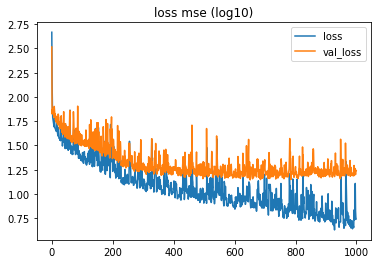

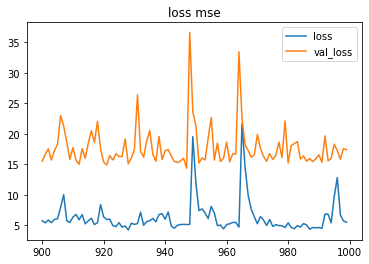

In [ ]:
train_loss_list = history_3.history['loss']
val_loss_list = history_3.history['val_loss']

x = np.arange(len(train_loss_list))

plt.plot(x, np.log10(train_loss_list))
plt.plot(x, np.log10(val_loss_list))
plt.legend(['loss', 'val_loss'])
plt.title("loss mse (log10)")
plt.show()

x_from = 900
plt.plot(x[x_from:], train_loss_list[x_from:])
plt.plot(x[x_from:], val_loss_list[x_from:])
plt.legend(['loss', 'val_loss'])
plt.title("loss mse")
plt.show()

### loss min (6.318, 13.623)

In [ ]:
min(train_loss_list),min(val_loss_list)

(4.255786418914795, 13.959859848022461)

##add more hidden layers,2 more

In [ ]:
model_4 = Sequential()
model_4.add(Dense(128, activation = 'relu', input_shape = (X_train.shape[1],)))
model_4.add(Dense(128, activation = 'relu'))
model_4.add(Dense(128, activation = 'relu'))
model_4.add(Dense(128, activation = 'relu'))
model_4.add(Dense(1))
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 128)               1792      
_________________________________________________________________
dense_10 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_11 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_12 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 129       
Total params: 51,457
Trainable params: 51,457
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_4.compile(optimizer='adam', loss = 'mse', metrics='mse')
history_4 = model_4.fit(X_train, y_train, epochs=1000, verbose = 1, validation_split=0.2)

Epoch 1/1000
11/11 [==============================] - 1s 15ms/step - loss: 540.3826 - mse: 540.3826 - val_loss: 105.6686 - val_mse: 105.6686
Epoch 2/1000
11/11 [==============================] - 0s 5ms/step - loss: 106.7824 - mse: 106.7824 - val_loss: 75.6173 - val_mse: 75.6173
Epoch 3/1000
11/11 [==============================] - 0s 5ms/step - loss: 76.3983 - mse: 76.3983 - val_loss: 100.6709 - val_mse: 100.6709
Epoch 4/1000
11/11 [==============================] - 0s 5ms/step - loss: 68.7373 - mse: 68.7373 - val_loss: 84.8849 - val_mse: 84.8849
Epoch 5/1000
11/11 [==============================] - 0s 5ms/step - loss: 68.5991 - mse: 68.5991 - val_loss: 73.8873 - val_mse: 73.8873
Epoch 6/1000
11/11 [==============================] - 0s 4ms/step - loss: 60.1347 - mse: 60.1347 - val_loss: 68.5586 - val_mse: 68.5586
Epoch 7/1000
11/11 [==============================] - 0s 5ms/step - loss: 59.8061 - mse: 59.8061 - val_loss: 70.5000 - val_mse: 70.5000
Epoch 8/1000
11/11 [===================

In [ ]:
loss, acc = model_4.evaluate(X_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 29.1685 - mse: 29.1685


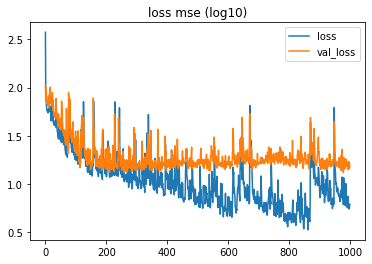

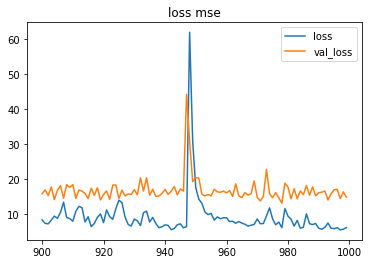

In [ ]:
train_loss_list = history_4.history['loss']
val_loss_list = history_4.history['val_loss']

x = np.arange(len(train_loss_list))

plt.plot(x, np.log10(train_loss_list))
plt.plot(x, np.log10(val_loss_list))
plt.legend(['loss', 'val_loss'])
plt.title("loss mse (log10)")
plt.show()

x_from = 900
plt.plot(x[x_from:], train_loss_list[x_from:])
plt.plot(x[x_from:], val_loss_list[x_from:])
plt.legend(['loss', 'val_loss'])
plt.title("loss mse")
plt.show()

### loss min (3.507, 12.399)

In [ ]:
min(train_loss_list),min(val_loss_list)

(3.3462257385253906, 13.143560409545898)

##add some regularization

 #### L2-regularization

In [ ]:
from keras import regularizers

model_5 = Sequential()
model_5.add(Dense(64, activation = 'relu',kernel_regularizer=regularizers.l2(0.001), input_shape = (X_train.shape[1],)))
model_5.add(Dense(64, activation = 'relu',kernel_regularizer=regularizers.l2(0.001)))
model_5.add(Dense(1))
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_15 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_5.compile(optimizer='adam', loss = 'mse', metrics='mse')
history_5 = model_5.fit(X_train, y_train, epochs=1000, verbose = 1, validation_split=0.2)

Epoch 1/1000
11/11 [==============================] - 0s 17ms/step - loss: 1916.7820 - mse: 1916.6983 - val_loss: 425.4327 - val_mse: 425.3537
Epoch 2/1000
11/11 [==============================] - 0s 5ms/step - loss: 251.1732 - mse: 251.0956 - val_loss: 245.5229 - val_mse: 245.4494
Epoch 3/1000
11/11 [==============================] - 0s 5ms/step - loss: 147.1500 - mse: 147.0776 - val_loss: 113.1378 - val_mse: 113.0690
Epoch 4/1000
11/11 [==============================] - 0s 5ms/step - loss: 93.4710 - mse: 93.4031 - val_loss: 92.6720 - val_mse: 92.6071
Epoch 5/1000
11/11 [==============================] - 0s 5ms/step - loss: 51.1602 - mse: 51.0962 - val_loss: 70.2916 - val_mse: 70.2301
Epoch 6/1000
11/11 [==============================] - 0s 5ms/step - loss: 58.8764 - mse: 58.8156 - val_loss: 69.7731 - val_mse: 69.7144
Epoch 7/1000
11/11 [==============================] - 0s 5ms/step - loss: 54.5581 - mse: 54.5001 - val_loss: 66.0184 - val_mse: 65.9623
Epoch 8/1000
11/11 [=============

In [ ]:
loss, acc = model_5.evaluate(X_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 29.3102 - mse: 29.1988


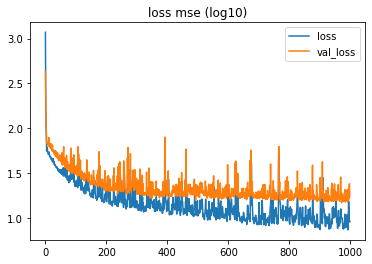

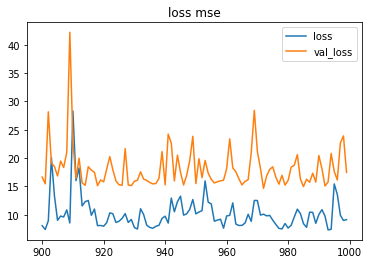

In [ ]:
train_loss_list = history_5.history['loss']
val_loss_list = history_5.history['val_loss']

x = np.arange(len(train_loss_list))

plt.plot(x, np.log10(train_loss_list))
plt.plot(x, np.log10(val_loss_list))
plt.legend(['loss', 'val_loss'])
plt.title("loss mse (log10)")
plt.show()

x_from = 900
plt.plot(x[x_from:], train_loss_list[x_from:])
plt.plot(x[x_from:], val_loss_list[x_from:])
plt.legend(['loss', 'val_loss'])
plt.title("loss mse")
plt.show()

#### loss min (5.982, 12.735)

In [ ]:
min(train_loss_list),min(val_loss_list)

(7.3123860359191895, 14.64816665649414)

In [ ]:
model_6 = Sequential()
model_6.add(Dense(128, activation = 'relu',kernel_regularizer=regularizers.l2(0.001), input_shape = (X_train.shape[1],)))
model_6.add(Dense(128, activation = 'relu',kernel_regularizer=regularizers.l2(0.001)))
model_6.add(Dense(128, activation = 'relu',kernel_regularizer=regularizers.l2(0.001)))
model_6.add(Dense(128, activation = 'relu',kernel_regularizer=regularizers.l2(0.001)))
model_6.add(Dense(1))
model_6.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 128)               1792      
_________________________________________________________________
dense_18 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_19 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_20 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 129       
Total params: 51,457
Trainable params: 51,457
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_6.compile(optimizer='adam', loss = 'mse', metrics='mse')
history_6 = model_4.fit(X_train, y_train, epochs=1000, verbose = 1, validation_split=0.2)

Epoch 1/1000
11/11 [==============================] - 0s 9ms/step - loss: 12.3484 - mse: 12.3484 - val_loss: 15.7840 - val_mse: 15.7840
Epoch 2/1000
11/11 [==============================] - 0s 6ms/step - loss: 11.1134 - mse: 11.1134 - val_loss: 14.6155 - val_mse: 14.6155
Epoch 3/1000
11/11 [==============================] - 0s 5ms/step - loss: 8.2459 - mse: 8.2459 - val_loss: 16.4683 - val_mse: 16.4683
Epoch 4/1000
11/11 [==============================] - 0s 5ms/step - loss: 6.9224 - mse: 6.9224 - val_loss: 14.8847 - val_mse: 14.8847
Epoch 5/1000
11/11 [==============================] - 0s 6ms/step - loss: 5.3907 - mse: 5.3907 - val_loss: 14.1600 - val_mse: 14.1600
Epoch 6/1000
11/11 [==============================] - 0s 5ms/step - loss: 4.9339 - mse: 4.9339 - val_loss: 14.5311 - val_mse: 14.5311
Epoch 7/1000
11/11 [==============================] - 0s 6ms/step - loss: 5.2492 - mse: 5.2492 - val_loss: 15.4990 - val_mse: 15.4990
Epoch 8/1000
11/11 [==============================] - 0s 6

In [ ]:
loss, acc = model_6.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 205.2175 - mse: 204.8100


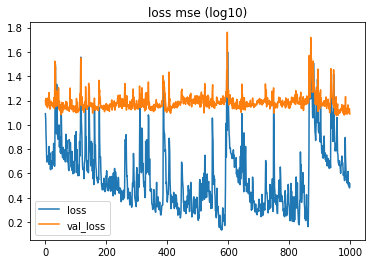

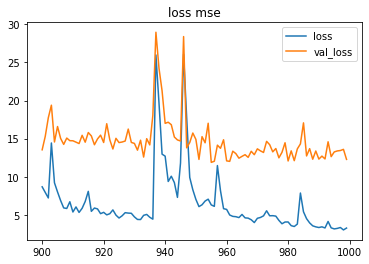

In [ ]:
train_loss_list = history_6.history['loss']
val_loss_list = history_6.history['val_loss']

x = np.arange(len(train_loss_list))

plt.plot(x, np.log10(train_loss_list))
plt.plot(x, np.log10(val_loss_list))
plt.legend(['loss', 'val_loss'])
plt.title("loss mse (log10)")
plt.show()

x_from = 900
plt.plot(x[x_from:], train_loss_list[x_from:])
plt.plot(x[x_from:], val_loss_list[x_from:])
plt.legend(['loss', 'val_loss'])
plt.title("loss mse")
plt.show()

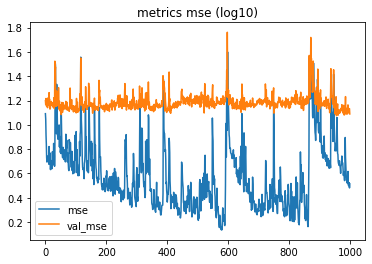

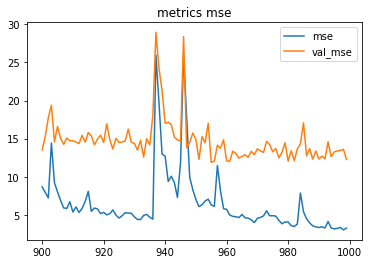

In [ ]:
train_metrics_list = history_6.history['mse']
val_metrics_list = history_6.history['val_mse']

x = np.arange(len(train_metrics_list))

plt.plot(x, np.log10(train_metrics_list))
plt.plot(x, np.log10(val_metrics_list))
plt.legend(['mse', 'val_mse'])
plt.title("metrics mse (log10)")
plt.show()

x_from = 900
plt.plot(x[x_from:], train_metrics_list[x_from:])
plt.plot(x[x_from:], val_metrics_list[x_from:])
plt.legend(['mse', 'val_mse'])
plt.title("metrics mse")
plt.show()

### loss min (1.175, 12.491)

In [ ]:
min(train_loss_list),min(val_loss_list)

(1.3638763427734375, 11.884214401245117)

In [ ]:
min(train_metrics_list),min(val_metrics_list)

(1.3638763427734375, 11.884214401245117)

###dropout

In [ ]:
from tensorflow.keras.layers import Dense, Dropout

model_7 = Sequential()
model_7.add(Dense(128, activation = 'relu', input_shape = (X_train.shape[1],)))
model_7.add(Dropout(0.5))
model_7.add(Dense(128, activation = 'relu'))
model_7.add(Dropout(0.5))
model_7.add(Dense(128, activation = 'relu'))
model_7.add(Dropout(0.5))
model_7.add(Dense(128, activation = 'relu'))
model_7.add(Dropout(0.5))
model_7.add(Dense(1))
model_7.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 128)               1792      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 128)              

In [ ]:
model_7.compile(optimizer='adam', loss = 'mse', metrics='mse')
history_7 = model_4.fit(X_train, y_train, epochs=1000, verbose = 1, validation_split=0.2)

Epoch 1/1000
11/11 [==============================] - 0s 10ms/step - loss: 2.9910 - mse: 2.9910 - val_loss: 13.7350 - val_mse: 13.7350
Epoch 2/1000
11/11 [==============================] - 0s 5ms/step - loss: 3.1003 - mse: 3.1003 - val_loss: 12.5457 - val_mse: 12.5457
Epoch 3/1000
11/11 [==============================] - 0s 5ms/step - loss: 2.8691 - mse: 2.8691 - val_loss: 13.2407 - val_mse: 13.2407
Epoch 4/1000
11/11 [==============================] - 0s 5ms/step - loss: 3.8963 - mse: 3.8963 - val_loss: 14.4459 - val_mse: 14.4459
Epoch 5/1000
11/11 [==============================] - 0s 5ms/step - loss: 3.4356 - mse: 3.4356 - val_loss: 12.6688 - val_mse: 12.6688
Epoch 6/1000
11/11 [==============================] - 0s 5ms/step - loss: 3.4843 - mse: 3.4843 - val_loss: 14.4809 - val_mse: 14.4809
Epoch 7/1000
11/11 [==============================] - 0s 5ms/step - loss: 3.2222 - mse: 3.2222 - val_loss: 12.9408 - val_mse: 12.9408
Epoch 8/1000
11/11 [==============================] - 0s 5ms/

In [ ]:
loss, acc = model_7.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 141.3751 - mse: 141.3751


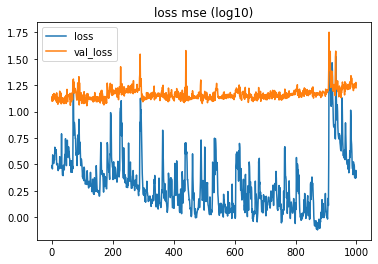

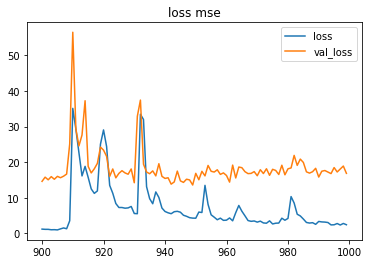

In [ ]:
train_loss_list = history_7.history['loss']
val_loss_list = history_7.history['val_loss']

x = np.arange(len(train_loss_list))

plt.plot(x, np.log10(train_loss_list))
plt.plot(x, np.log10(val_loss_list))
plt.legend(['loss', 'val_loss'])
plt.title("loss mse (log10)")
plt.show()

x_from = 900
plt.plot(x[x_from:], train_loss_list[x_from:])
plt.plot(x[x_from:], val_loss_list[x_from:])
plt.legend(['loss', 'val_loss'])
plt.title("loss mse")
plt.show()

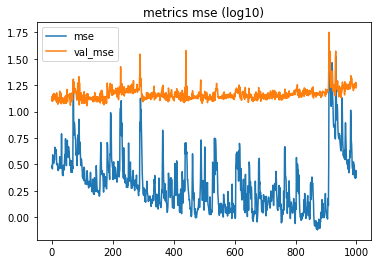

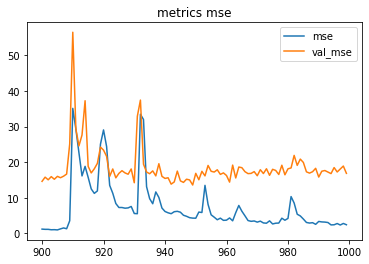

In [ ]:
train_metrics_list = history_7.history['mse']
val_metrics_list = history_7.history['val_mse']

x = np.arange(len(train_metrics_list))

plt.plot(x, np.log10(train_metrics_list))
plt.plot(x, np.log10(val_metrics_list))
plt.legend(['mse', 'val_mse'])
plt.title("metrics mse (log10)")
plt.show()

x_from = 900
plt.plot(x[x_from:], train_metrics_list[x_from:])
plt.plot(x[x_from:], val_metrics_list[x_from:])
plt.legend(['mse', 'val_mse'])
plt.title("metrics mse")
plt.show()

#### loss min(0.224,10.806)

In [ ]:
min(train_loss_list),min(val_loss_list)

(0.7580341696739197, 11.369606018066406)

In [ ]:
min(train_metrics_list),min(val_metrics_list)

(0.7580341696739197, 11.369606018066406)

#The End